# Aufgabenblatt 8

## Testverfahren 1

### Aufgabe 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f, chi2

Eine neue Sorte von Reagenzgläsern soll bezüglich ihrer Schmelztemperatur mit einer gebräuchlichen Sorte, bei der die mittlere Schmelztemperatur $745^\circ$C beträgt, verglichen werden. Bei der neuen Sorte von Reagenzgläsern wurden folgende Temperaturwerte ermittelt (in $^\circ$C):

675 720 621 653 750 631 742 828 715 611 790 671 820 730 650 785

Es wird angenommen, dass die Messwerte $x_1,\ldots,x_{16}$ eine Realisierung von unabhängigen identisch $N(\mu,4900)$-verteilten Zufallsvariablen $X_1,\ldots,X_{16}$ sind. Durch Anwendung eines geeigneten Tests zum Niveau 0.05 überprüfe man

a) die Hypothese $H_0: \mu=745$ gegen $H_1:\mu \neq 745$  
b) die Hypothese $H_0: \mu=745$ gegen $H_1:\mu < 745$

Plotten Sie jeweils den Annahmebereich als Fläche unter der Dichtefunktion der Testverteilung.

In [ ]:
temp <- c(675, 720, 621, 653, 750, 631, 742, 828, 715, 611, 790, 671, 820, 730, 650, 785)

In [9]:
n = 16
mu = 745
sigma = np.sqrt(4900)
x_bar = (675+ 720+ 621+ 653+ 750+ 631+ 742+ 828+ 715+ 611+ 790+ 671+ 820+ 730+ 650+ 785)/n
z = (x_bar-mu)/(sigma/np.sqrt(n))
print(x_bar)
print(z)

712.0
-1.8857142857142857


1.

$\mu=745$ vs. $H_1:\mu \neq745$

Signifikanzniveau $\alpha=0,05$ ⇒ Auf beide Seiten verteilt $\alpha/2=0,025$

Ablehnungsbereich bei einem zweiseitigen Test ist:

$$|Z| > z_{0,025} \approx 1,96$$

Der Annahmebereich ist also:

$$-1,96 \leq Z \leq +1,96$$

In unseren Daten ist

$$Z \approx -1,886$$

und damit gilt

$$|-1,886| = 1,886<1,96$$

Ergebnis (zweiseitig): Wir verwerfen $H_0$ nicht, da $Z$ nicht extrem genug ist ($∣Z∣$ ist kleiner als $1,96$).

2.

Signifikanzniveau $\alpha=0,05$ ⇒ die gesamte Wahrscheinlichkeit $α$ liegt im linken (unteren) Verwerfungsbereich

Ablehnungsbereich bei einem zweiseitigen Test ist:

$$|Z| < z_{0,05} \approx -1,645$$

Der Annahmebereich ist also:

$$Z \geq -1,645$$

Mit demselben Testwert

$$Z \approx -1,886$$

liegt dieser kleiner als $−1,645$

$$-1,886 < -1,645$$

Ergebnis (linksseitig): Wir verwerfen $H_0$, da $Z$ in den Ablehnungsbereich fällt.

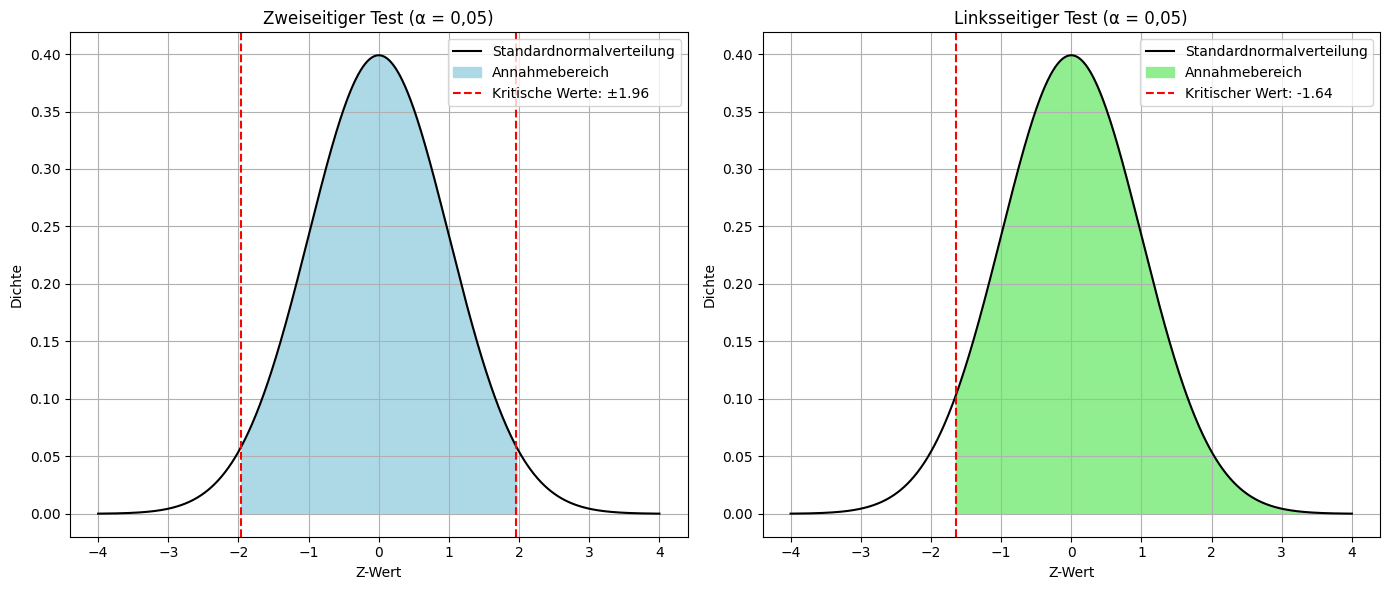

In [25]:
alpha = 0.05

# Zweiseitiger Test
# Kritische Werte für z_alpha/2
z_critical_two_sided = norm.ppf(1 - alpha/2)

# Linksseitiger Test
# Kritischer Wert für z_alpha
z_critical_left = norm.ppf(alpha)

# Erstellen eines Bereichs von Z-Werten
z = np.linspace(-4, 4, 1000)
pdf = norm.pdf(z)

# Erstellen der Plot-Figur
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Zweiseitiger Test
ax = axes[0]
ax.plot(z, pdf, 'k', label='Standardnormalverteilung')

# Schattieren des Annahmebereichs
z_fill_left = np.linspace(-z_critical_two_sided, z_critical_two_sided, 1000)
ax.fill_between(z_fill_left, norm.pdf(z_fill_left), color='lightblue', label='Annahmebereich')

# Markieren der kritischen Werte
ax.axvline(-z_critical_two_sided, color='red', linestyle='--', label=f'Kritische Werte: ±{z_critical_two_sided:.2f}')
ax.axvline(z_critical_two_sided, color='red', linestyle='--')

# Beschriftungen und Titel
ax.set_title('Zweiseitiger Test (α = 0,05)')
ax.set_xlabel('Z-Wert')
ax.set_ylabel('Dichte')
ax.legend()
ax.grid(True)

# 2. Linksseitiger Test
ax = axes[1]
ax.plot(z, pdf, 'k', label='Standardnormalverteilung')

# Schattieren des Annahmebereichs
z_fill_left = np.linspace(z_critical_left, 4, 1000)
ax.fill_between(z_fill_left, norm.pdf(z_fill_left), color='lightgreen', label='Annahmebereich')

# Markieren des kritischen Wertes
ax.axvline(z_critical_left, color='red', linestyle='--', label=f'Kritischer Wert: {z_critical_left:.2f}')

# Beschriftungen und Titel
ax.set_title('Linksseitiger Test (α = 0,05)')
ax.set_xlabel('Z-Wert')
ax.set_ylabel('Dichte')
ax.legend()
ax.grid(True)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


### Aufgabe 2

Das Gewicht von Brötchen (gemessen in g) ist zufallsabhängig. Man nimmt an, dass die Zufallsvariable, die das Gewicht beschreibt, $N(\mu, 36)$ verteilt ist. Für 81 (zufällig und unabhängig) ausgewählte Brötchen ergab sich das Durchschnittsgewicht zu $\overline{x}=37$g.

a) Man überprüfe mittels eines zweiseitigen Tests, ob das Datenmaterial mit der Nullhypothese $H_0$: "Das Durchschnittsgewicht der Brötchen beträgt 38g" auf dem 5\%-Niveau vereinbar ist.  
b) Sei nun $\mu=37$ der tatsächliche Wert von $\mu$. Wie groß ist dann die Fehlerwahrscheinlichkeit 2. Art bei dem in a) angewendeten Test? Plotten Sie die Fehlerwahrscheinlichkeit 2. Art als Fläche unter den beiden Dichtefunktionen.  
c) Der Test in a) soll durch Erhöhung des Stichprobenumfanges so abgeändert werden, dass unter Beibehaltung der Hypothese $H_0$ und der Fehlerwahrscheinlichkeit 1. Art nun für die Alternative $H_1: \mu_1=37$ die Fehlerwahrscheinlichkeit 2. Art kleiner gleich 5\% wird. Wie groß muss der Stichprobenumfang $n$ mindestens gewählt werden, damit das gewährleistet ist?

$\mu=38$ vs. $H_1:\mu \neq 38$

Signifikanzniveau $\alpha=0,05$ ⇒ Auf beide Seiten verteilt $\alpha/2=0,025$

$$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} = -1,5$$

Ablehnungsbereich bei einem zweiseitigen Test ist:

$$|Z| > z_{0,025} \approx 1,96$$

Der Annahmebereich ist also:

$$-1,96 \leq Z \leq +1,96$$

In unseren Daten ist

$$Z = -1,5$$

und damit gilt

$$|-1,5| = 1,5<1,96$$

Schlussfolgerung: Wir verwerfen $H_0$ nicht

Die Fehlerwahrscheinlichkeit 2. Art ($\beta$) ist die Wahrscheinlichkeit, dass wir die Nullhypothese nicht ablehnen, obwohl die Alternativhypothese wahr ist. In diesem Fall ist die Alternativhypothese $\mu=37$

$$Z' = \frac{\bar{X}-38}{6/9}$$
$$\bar{X} ~ N(37, \frac{36}{81})$$
$$\beta = P(-1,96 \leq \frac{\bar{X}-38}{6/9} \leq 1,96)$$
$$\beta = P(-1,96*6/9+37 \leq \bar{X} \leq 1,96*6/9+37)$$
$$\beta = P(-2.307 \leq \bar{X} \leq 0.307)$$
$$\beta = P(\frac{-2.307-37}{36/81} \leq Z \leq \frac{0.307-37}{36/81})$$
$$\beta = P(-88.44 \leq Z \leq -82,56)$$

Die Power-Bedingung lässt sich umformulieren zu:

$$P(\bar{X}<\mu-z_{\alpha/2}*\sigma_x \text{oder} \bar{X} > \mu+z_{\alpha/2}*\sigma_x |\mu = 37) \geq 0,95$$

Dies entspricht:

$$P(\bar{X}<\mu-z_{\alpha/2}*\sigma_x  |\mu = 37) + P(\bar{X} > \mu+z_{\alpha/2}*\sigma_x|\mu = 37) \geq 0,95$$

Da $μ=37$, ist die Differenz $μ_0−μ_1=1$

Wir können die Bedingung nach $n$ umstellen. Hier nutzen wir die Beziehung zwischen den kritischen Z-Werten und den tatsächlichen Mittelwerten.

Die Formel zur Bestimmung des Stichprobenumfangs für eine gegebene Power ist:

$$n = (\frac{(z_{\alpha/2}+z_{\beta})*\sigma}{\mu_0-\mu_1})^2$$
$$n = (\frac{(1.96+1.645)*6}{1})^2 = 467$$

### Aufgabe 3

Es wird angenommen, dass die vorliegenden Messwerte $x_1,\ldots,x_{10}$ bzw. $y_1,\ldots,y_{16}$ eine Realisierung von unabhängigen identisch $N(\mu_1,0.25)$ bzw. $N(\mu_2,0.36)$-verteilten Zufallsvariablen sind:

$x_i$: 5.46 5.34 4.34 4.82 4.40 5.12 5.69 5.53 4.77 5.82

$y_i$: 5.45 5.31 4.11 4.69 4.18 5.05 5.72 5.54 4.62 5.89 5.60 5.19 3.31 4.43 5.30 4.09

Man überprüfe die Hypothese $H_0: \mu_2\geq\mu_1$ gegen $H_1: \mu_2 <\mu_1$ mit einem geeigneten Test zum Niveau $\alpha=0.05$.


In [3]:
x <- c(5.46, 5.34, 4.34, 4.82, 4.40, 5.12, 5.69, 5.53, 4.77, 5.82)
y <- c(5.45, 5.31, 4.11, 4.69, 4.18, 5.05, 5.72, 5.54, 4.62, 5.89, 5.60, 5.19, 3.31, 4.43, 5.30, 4.09)

a) Test der Hypothese $H_0:\mu_2 \geq \mu_1$ gegen $H_0:;\mu_2 < \mu_1$ auf Niveau $\alpha=0,05$

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
    $H_0:\mu_2 \geq \mu_1$

    Alternativhypothese ($H_1$):
    $H_1:\mu_2 < \mu_1$

2. Berechnung der Stichprobenvarianzen
    Gruppe X:

    $\bar{X} = \frac{5,46+5,34+4,34+4,82+4,40+5,12+5,69+5,53+4,77+5,82}{10} = 5.129$ kg

    Gruppe Y:

    $\bar{Y} = \frac{5,45+5,31+4,11+4,69+4,18+5,05+5,72+5,54+4,62+5,89+5,60+5,19+3,31+4,43+5,30+4,09}{16} = 4.905$ kg 

3. Teststatistik

Da die Varianzen bekannt und die Stichproben unabhängig sind, verwenden wir einen Z-Test für den Vergleich der Mittelwerte.

Die Teststatistik $Z$ lautet:

$Z=\frac{\bar{Y}-\bar{X}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}} = \frac{4.905-5.129}{\sqrt{\frac{0.25}{10}+\frac{0.36}{10}}} \approx -1.027$

4. Kritische Werte und Entscheidungsregel

Für einen einseitigen Test ($H_1$:$\mu_2<\mu_1$) mit $\alpha=0,05$ ist der kritische Z-Wert:

In [8]:
alpha = 0.05
z_critical = norm.ppf(alpha)

print(z_critical)

-1.6448536269514729


Entscheidungsregel:

Ablehnungsbereich:
$Z<-1.645$

Annahmebereich:
$Z \geq -1.645$

Da der berechnete Z-Wert $Z \approx -1.027$ innerhalb des Annahmebereichs liegt:

$-1.027>-1.645$

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, um die Nullhypothese auf dem 5%-Niveau abzulehnen.

### Aufgabe 4

In einem landwirtschaftlichen Betrieb erhielten von 20 Versuchsrindern 10 Rinder (Gruppe I) jeden Tag Kraftfutter der Zusammensetzung A, die übrigen 10 Rinder (Gruppe II) erhielten das herkömmliche Futter der Zusammensetzung B. Nach einer gewissen Zeit wurde die Gewichszunahme in kg in beiden Gruppen festgestellt:

Gruppe I:  7.2 4.1 5.5 4.5 5.7 3.8 4.6 6.0 5.2 5.4

Gruppe II: 5.3 4.4 5.0 3.5 3.9 4.9 5.6 2.5 4.0 3.6

a) Unter der Annahme, dass sich die Gewichtszunahme durch unabhängige, in beiden Fällen identisch normalverteilte Zufallsvariablen beschreiben lässt, prüfe man mit einem geeigneten Test zum Niveau $\alpha=0.1$, ob die Annahme, dass die Gewichtszunahme bei Verabreichung von Kraftfutter der Zusammensetzung A die gleiche Streuung aufweist wie die Gewichtszunahme bei Verabreichung des herkömmlichen Futters der Zusammensetzung B, zu verwerfen ist. Plotten Sie den Annahmebereich als Fläche unter der Dichtefunktion der Testverteilung.  
b) Unter der Annahme, dass sich die Gewichtszunahme durch unabhängige, in beiden Fällen identisch normalverteilte Zufallsvariablen mit gleicher Varianz beschreiben lässt, prüfe man mit einem geeigneten Test zum Niveau $\alpha=0.025$ die Hypothese, dass die Gewichtszunahme bei Verabreichung von Kraftfutter der Zusammensetzung A nicht größer ist als die Gewichtszunahme bei Verabreichung des herkömmlichen Futters der Zusammensetzung B.

a) Test auf Gleichheit der Varianzen (Streuungen) zum Niveau $\alpha = 0,1$

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
    $H_0:\sigma_I^2 = \sigma_{II}^2$

    Alternativhypothese ($H_1$):
    $H_0:\sigma_I^2 \neq \sigma_{II}^2$

2. Berechnung der Stichprobenvarianzen
    Gruppe X:

    $\bar{X} = \frac{7.2+4.1+5.5+4.5+5.7+3.8+4.6+6.0+5.2+5.4}{10} = 5.2$ kg

    Stichprobenvarianz ($s_1^2$):

    $s_I^2 = \frac{\sum(x_i-\bar{X_I})^2}{n_1-1} = \frac{9.04}{9} \approx 1.005$ kg$^2$ 

3. Teststatistik

Der F-Test wird verwendet, um die Gleichheit der Varianzen zu prüfen. Die Teststatistik lautet:

$F=\frac{s_1^2}{s_2^2}$

Da wir die Alternativhypothese ($H_1$): $H_0:\sigma_I^2 \neq \sigma_{II}^2$ prüfen, handelt es sich um einen zweiseitigen Test.

Berechnung der Teststatistik:

$F=\frac{1.005}{0.9068} \approx 1.108$

4. Kritische Werte und Entscheidungsregel

Für einen zweiseitigen F-Test zum Niveau $\alpha = 0.1$ (also $\alpha/2=0.05$ für jede Seite) und Freiheitsgrade $df_1=n_1−1=9$ und $df_2=n_2−1=9$ benötigen wir die kritischen F-Werte $F_{0.95,9,9}$ und $F_{0.05,9,9}$

In [11]:
alpha = 0.1
df1 = 9
df2 = 9

F_upper = f.ppf(1 - alpha/2, df1, df2)
F_lower = 1 / F_upper

print(F_upper)
print(F_lower)

3.178893104458269
0.31457490615130795


Entscheidungsregel:

Ablehnungsbereich:
$F<0.314$ oder $F>3.18$

Annahmebereich:
$0.314 \geq F \geq 3.18$

Da der berechnete F-Wert $F \approx 1.108$ innerhalb des Annahmebereichs liegt:

$0.314 \geq 1.108 \geq 3.18$

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, um die Gleichheit der Varianzen der beiden Gruppen auf dem 10%-Niveau abzulehnen.

b) Test auf Unterschiede der Mittelwerte unter Annahme gleicher Varianzen zum Niveau α $\alpha = 0,025$

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
    Das Durchschnittsgewicht der Gruppe I ist nicht größer als das der Gruppe II.
    $H_0:\mu_I \leq \mu_{II}$

    Alternativhypothese ($H_1$):
    Das Durchschnittsgewicht der Gruppe I ist größer als das der Gruppe II.
    $H_1:\mu_I > \mu_{II}$

2. Berechnung der der Teststatistik:
    $S_p^2 = \frac{(n_1-1)s_I^2+(n_2-1)s_{II}^2}{n_1+n_2-2}$
    $S_p^2 = \frac{(10-1)*1.005+(10-1)*0.9068}{10+10-2} \approx 0.956$

    $SE = \sqrt{S_p^2(\frac{1}{n_1}+\frac{1}{n_2})} = \sqrt{0.956(\frac{1}{10}+\frac{1}{10})} \approx 0.4376$ kg
    $t = \frac{\bar{X_I}-\bar{X_{II}}}{SE} = \frac{5.2-4.27}{0.4376} \approx 2.126$

3. Kritische Werte und Entscheidungsregel

Da es sich um einen einseitigen Test handelt ($H_1:\mu_I>\mu_{II}$) und $\alpha=0.025$, suchen wir den kritischen t-Wert $t_{0.975,df}$ mit $df=n1+n2−2=18$.


In [12]:
alpha = 0.025
df = 18

t_critical = t.ppf(1 - alpha, df)

print(t_critical)

2.10092204024096


Entscheidungsregel:

Ablehnungsbereich:
$t<2.1$

Annahmebereich:
$t \leq 2.1$

Da der berechnete t-Wert $t \approx 2.126$ größer als der kritische Wert $2.1$ ist:

$2.126 > 2.1$

Schlussfolgerung:
Wir verwerfen $H_0$. Es gibt ausreichende Belege, um die Hypothese abzulehnen, dass die Gewichtszunahme bei Verabreichung von Kraftfutter der Zusammensetzung A nicht größer ist als die bei Zusammensetzung B auf dem 2,5%-Niveau.

In [ ]:
g1 <- c(7.2, 4.1, 5.5, 4.5, 5.7, 3.8, 4.6, 6.0, 5.2, 5.4)
g2 <- c(5.3, 4.4, 5.0, 3.5, 3.9, 4.9, 5.6, 2.5, 4.0, 3.6)

### Aufgabe 5

Bei einer Untersuchung der Auswirkungen eines Medikaments auf das Wachstum wurde 15 jungen Versuchstieren das Medikament verabreicht. Einer Vergleichsgruppe mit 20 Tieren wurde das Medikament nicht gegeben. Bei der ersten Gruppe errechnete man aus den Zunahmen $x_1,\ldots,x_{15}$ der Körperlängen der Tiere während der Versuchszeit das arithmetische Mittel $\overline{x}=72$cm und die Streuung $s_x=13$cm, bei der Vergleichsgruppe aus den Zunahmen $y_1,\ldots,y_{20}$ der Körperlängen das arithmetische Mittel $\overline{y}=75$cm und die Streuung $s_y=12$cm. Man überprüfe mit dem Zweistichproben-t-Test zum Niveau $\alpha=0.05$ die Behauptung, dass das Medikament keine Auswirkung auf das Wachstum habe.

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
   Kein Unterschied.
    $H_0:\mu_I = \mu_{II}$

    Alternativhypothese ($H_1$):
    Unterschied vorhanden.
    $H_1:\mu_I \neq \mu_{II}$

2. Berechnung der der Teststatistik:

   Da wir zwei unabhängige Stichproben mit unterschiedlichen Stichprobengrößen und unbekannten, aber möglicherweise ungleichen Varianzen haben, verwenden wir den Zweistichproben-t-Test mit ungleichen Varianzen
   
    $t=\frac{\bar{X}-\bar{Y}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$
   
   $t=\frac{72-75}{\sqrt{\frac{13^2}{15}+\frac{12^2}{20}}} \approx - 0.698$

3. Bestimmung der Freiheitsgrade

Für den Welch's t-Test verwenden wir die folgende Formel zur Berechnung der Freiheitsgrade ($df$):

$df = \approx \frac{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^2}{\frac{(\frac{s_1^2}{n_1})^2}{n_1-1}+\frac{(\frac{s_2^2}{n_2})^2}{n_2-1}}$

$df = \approx \frac{(\frac{169}{15}+\frac{144}{20})^2}{\frac{(\frac{169}{15})^2}{14}+\frac{(\frac{144}{20})^2}{19}} \approx 28.94$

4. Bestimmung des kritischen t-Wertes

Für einen zweiseitigen Test mit α=0,05α=0,05 und $df=29$ suchen wir den kritischen t-Wert $t0,975,29$.

In [9]:
alpha = 0.05
df = 29

t_critical = t.ppf(1 - alpha/2, df)
print(t_critical)

2.045229642132703


Entscheidungsregel:

Ablehnungsbereich:
$|t|>2.045$

Annahmebereich:
$|t| \leq 2.045$

Da der berechnete t-Wert $t \approx 2.045$:

$|-0,698| = 0,698<2,045$

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, um die Nullhypothese auf dem 5%-Niveau abzulehnen. Das Medikament hat demnach keinen signifikanten Einfluss auf das Wachstum der Versuchstiere.

### Aufgabe 6

Um die Genauigkeit eines neu entwickelten Gerätes zur Messung von Weglängen im Gelände zu kontrollieren, wurde eine Strecke von 1000 m zehnmal vermessen.

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
  \hline
  \textrm{Messung} & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\ \hline
  \textrm{Messwert [m]} & 998.0 & 1001.0 & 1003.0 & 1000.5 & 999.0 & 997.5 & 1000.0 & 999.5 & 996.0 & 998.5\\
  \hline
\end{array}
$$

Unter der Annahme, dass die Messwerte eine Realisierung unabhängiger $N(\mu,\sigma^2)$-verteilter Zufallsvariablen sind, sollen zum Niveau 5\% die Hypothesen getestet werden, dass

a) das Gerät im Mittel die korrekte Entfernung angibt,  
b) die Varianz $\sigma^2$ den Wert $\sigma_0^2=4$ \[m$^2$\], den herkömmliche Geräte aufweisen, nicht unterschreitet. Plotten Sie den Annahmebereich als Fläche unter der Dichtefunktion der Testverteilung.

In [6]:
wl <- c(998.0, 1001.0, 1003.0, 1000.5, 999.0, 997.5, 1000.0, 999.5, 996.0, 998.5)

a) Mittelwert

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
   Kein Unterschied.
    $H_0:\mu = 1000$

    Alternativhypothese ($H_1$):
    Unterschied vorhanden.
    $H_1:\mu \neq 1000$

2. Berechnung des Stichprobenmittelwerts und der Stichprobenstreuung:

   Mittelwert der Messungen ($\bar{X}$)
   
    $\bar{X} = \frac{\sum\limits^10_{i=1}x_i}{n} = \frac{998.0+1001.0+1003.0+1000.5+999.0+997.5+1000.0+999.5+996.0+998.5}{10} = 999.35$
   
   $s^2 = \frac{\sum(x_i-\bar{X})^2}{n_1-1}$

   Berechnung der Abweichungen ($x_i−\bar{X})^2$:
$(998.0−999.35)^2=1.8225$

$(1003.0−999.35)^2=13.3225$

$(999.0−999.35)^2=0.1225$

$(1000.0−999.35)^2=0.4225$

$(996.0−999.35)^2=11.2225$

$(1001.0−999.35)^2=2.7225$

$(1000.5−999.35)^2=1.3225$

$(997.5−999.35)^2=3.4225$

$(999.5−999.35)^2=0.0225$

$(998.5−999.35)^2=0.7225$

$s^2 = \frac{34.125}{9} \approx 3.7917$

$s \approx 1.947$

3. Teststatistik

Für den Test des Mittelwertes verwenden wir die t-Statistik:

$t=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}$

$t=\frac{999.35-1000}{1.947/\sqrt{10}} \approx -1.055$

4. Bestimmung des kritischen t-Wertes

Für einen zweiseitigen Test mit $\alpha=0.05$ und $n−1=9$ Freiheitsgraden ist der kritische Wert $t_{0.975,9}:$

In [16]:
alpha = 0.05
df = 9

t_critical = t.ppf(1 - alpha/2, df)
print(t_critical)

2.2621571627409915


Da der berechnete t-Wert:

$|t| = 1.055<2,262$

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, dass das Gerät im Mittel falsch misst.

b) Varianz

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$) Die Varianz des Geräts ist mindestens so groß wie die Referenzvarianz.:
    $H_0:\sigma^2 \geq \sigma_{0}^2 = 4$

    Alternativhypothese ($H_1$)  Die Varianz des Geräts ist kleiner als die Referenzvarianz.:
    $H_1:\sigma_I^2 < \sigma_{II}^2$

3. Teststatistik

Für den Test der Varianz verwenden wir die $\chi^2$-Statistik:

$\chi^2 = \frac{(n-1)s^2}{\sigma^2_0}$

$\chi^2 = \frac{(10-1)*3.7917}{4} \approx 8.531$

4. Kritische Werte und Entscheidungsregel

Der berechnete $\chi^2$-Wert ist:

In [17]:
alpha = 0.05
df = 9
chi2_critical = chi2.ppf(alpha, df)

print(chi2_critical)

3.325112843066815


Entscheidungsregel:

Ablehnungsbereich:
$\chi^2 < 3.325$

Da der berechnete $\chi^2$-Wert ist

$\chi^2 = 8.531 > 3.325$

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, dass die Varianz des Geräts kleiner ist als die Referenzvarianz.

### Aufgabe 7

Dem Hersteller eines Spülmittels wird von einer Verbraucherorganisation vorgeworfen, 3-kg-Packungen in den Handel zu bringen, deren Inhalt wesentlich unter dem Nenngewicht liegt. Die Verbraucherorganisation kauft 21 Packungen und stellt jeweils deren Nettogewicht fest. Dabei ergibt sich ein Stichprobenmittel von $\overline{x}=2.82$kg und eine Stichprobenvarianz von $s^2=0.04$kg$^2$.

a) Welches konkrete Schätzintervall zum Niveau 0.9 für den unbekannten Erwartungswert $\mu$ des Nettogewichts pro Packung ergibt sich, wenn man davon ausgehen kann, dass die Nettogewichte durch unabhängige $N(\mu,\sigma^2)$-verteilte Zufallsvariablen beschrieben werden können?  
b) Der Hersteller begründet das Untersuchungsergebnis mit dem Hinweis auf einen Defekt an der Verpackungsmaschine. Die Maschine sei inzwischen neu eingestellt. Zur Überprüfung dieser Aussage wird ein neuer Test durchgeführt. Die Hypothese $H_0: \mu=3$ wird gegen die Alternative $\mu<3$ mit einer Irrtumswahrscheinlichkeit von 1\% und bei einem Stichprobenumfang von $n=25$ getestet. Die Messergebnisse lieferten ein Stichprobenmittel von $\overline{x}=2.96$kg und eine Stichprobenvarianz von $s^2=0.01$kg$^2$. Wie lautet das Testergebnis?

a) Schätzintervall für den unbekannten Erwartungswert $\mu$:

Das Schätzintervall für den Erwartungswert μμ bei unbekannter Varianz basiert auf der t-Verteilung:

$$\bar{x} \pm t_{1-\alpha,n-1}*\frac{s}{\sqrt{n}}$$

In [23]:
alpha = 0.1
df = 20

t_critical = t.ppf(1 - alpha/2, df)
print(t_critical)

1.7247182429207857


$$[2.82-1.725*\frac{0.2}{\sqrt{21}}; 2.82+1.725*\frac{0.2}{\sqrt{21}}]$$

$$[2.7448; 2.8952]$$

b) Hypothesentest:

1. Formulierung der Hypothesen

    Nullhypothese ($H_0$):
    $H_0:\mu = 3$

    Alternativhypothese ($H_1$):
    Unterschied vorhanden.
    $H_1:\mu < 3$

2. Teststatistik

$t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}$

$t=\frac{2.96-3}{0.1/\sqrt{25}} = -2$

4. Bestimmung des kritischen t-Wertes

Für einen zweiseitigen Test mit $\alpha=0.01$ und $n−1=24$ Freiheitsgraden ist der kritische Wert $t_{0.01,24}:$

In [24]:
alpha = 0.01
df = 24

t_critical = t.ppf(alpha, df)
print(t_critical)

-2.4921594731575762


Ablehnungsbereich: $t<−2.492$
Annahmebereich: $t \geq −2.492$

$|t| = -2 $ (liegt nicht im Ablehnungsbereich)

Schlussfolgerung:
Wir verwerfen $H_0$ nicht. Es gibt keine ausreichenden Belege, dass das durchschnittliche Nettogewicht der Packungen signifikant unter 3 kg liegt.

### Aufgabe 8

Mit einem Produktionsverfahren zur Herstellung von bestimmten elektronischen Bauteilen erhielt man in einem gewissen Zeitraum bei 4000 gefertigten Bauteilen 2951 Bauteile erster Wahl. Man teste die Hypothese "Die Wahrscheinlichkeit für die Produktion eines Bauteils erster Wahl ist 3/4" gegen die Alternative "Die Wahrscheinlichkeit für die Produktion eines Bauteils erster Wahl ist kleiner als 3/4" auf dem Niveau 4\%, indem man die Quantile der Binomialverteilung durch die Quantile der Normalverteilung approximiert.

Gegebene Daten

Stichprobengröße: $n=4000$
Anzahl der Bauteile erster Wahl: $X=2951$
Nullhypothese: $H_0:p=0.75$
Alternativhypothese: $H_1:p<0.75$
Signifikanzniveau: $\alpha=0.04$

1. Approximation der Binomialverteilung durch die Normalverteilung

Unter der Nullhypothese ist X∼Binomial(n,p), wobei $p=0.75$. Für große $n$ approximieren wir diese Verteilung durch eine Normalverteilung $N(\mu,\sigma^2)$ mit:

Erwartungswert:

$$\mu=n*p=4000⋅0.75=3000$$

Varianz:

$$\sigma^2=n*p*(1−p)=4000⋅0.75⋅0.25=750$$

Standardabweichung:

$$\sigma=\sqrt{\sigma^2}=750 \approx 27.386$$

Die approximierte Normalverteilung lautet:

$$X∼N(3000,750)$$

2. Standardisierung

Um die Teststatistik in der Standardnormalverteilung $N(0,1)$ zu interpretieren, standardisieren wir $X$:

$$Z=\frac{X-\mu}{\sigma}=\frac{2951-3000}{27.386} \approx -1.79$$

3. Kritischer Wert

Für das einseitige Signifikanzniveau $\alpha=0.04$ suchen wir das kritische Quantil der Standardnormalverteilung $z_{0.04}, das die untersten 4% der Verteilung umfasst:

In [27]:
alpha = 0.04
z_critical = norm.ppf(alpha)

print(z_critical)

-1.75068607125217


4. Entscheidungsregel

    Ablehnungsbereich: $Z<−1.75$
    Annahmebereich: $Z \geq −1.75$

5. Entscheidung

Der berechnete Z-Wert ist:
$Z=−1.79$

Da $Z<−1.75$, liegt der Z-Wert im Ablehnungsbereich.

Schlussfolgerung

Wir verwerfen die Nullhypothese $H_0$ auf dem Niveau $\alpha=0.04$. Es gibt signifikante Hinweise darauf, dass die Wahrscheinlichkeit, ein Bauteil erster Wahl zu produzieren, kleiner als $\frac{3}{4}$ ist.